In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('BD.xls')


In [12]:
df


,track_name,track_artists,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,Penetration in the Centrefold - 2010 Remaster,DEVO,rock,0.579,0.713,1.0,-10.438,1.0,0.0361,0.16400,0.001260,0.2330,0.831,115.665,2wiA6eP7rBktnxmjgX8g7U,149427.0,4.0
1,Fever,Judas Priest,rock,0.486,0.696,9.0,-7.557,1.0,0.0406,0.00671,0.000141,0.1140,0.325,111.370,48xD8fTt37etYF52AJBiXF,320253.0,4.0
2,Don't Wanna Let You Go,Quiet Riot,rock,0.638,0.806,2.0,-6.989,1.0,0.0529,0.10500,0.000247,0.0803,0.830,108.257,74wIEdRJGZR5aaKu2XnREO,281133.0,4.0
3,Lo/Hi,The Black Keys,rock,0.606,0.679,2.0,-7.445,1.0,0.0321,0.01510,0.000433,0.0962,0.707,122.016,25YlltWXRb9k7KbrEBRuhJ,177768.0,4.0
4,New Minglewood Blues - Live at Nassau Coliseum...,Grateful Dead,rock,0.612,0.802,9.0,-9.715,1.0,0.0438,0.61700,0.101000,0.7190,0.673,104.453,2CczZm7lbN6DEeOvct2K6s,454573.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15790,The Judge,Buddy Brown,country,0.518,0.754,1.0,-6.366,1.0,0.0444,0.00701,0.000012,0.1010,0.560,175.999,2CMGAu0krhuwn7BKpjwLz0,211547.0,4.0
15791,Jingle Bell Rock,Blake Shelton,country,0.650,0.736,0.0,-5.222,1.0,0.0378,0.12200,0.000000,0.0998,0.595,129.941,5SzBQvpCZGuWP3FcLlUtVd,123400.0,4.0
15792,Flyin' Saucers Rock 'n' Roll,Billy Lee Riley,country,0.430,0.653,2.0,-8.957,1.0,0.0732,0.68400,0.000029,0.2200,0.679,165.018,5d0O0zKttFsO60cXzdQYjX,122108.0,4.0
15793,Pecan Pie,Golden Smog,country,0.498,0.570,7.0,-11.587,1.0,0.0266,0.22500,0.000005,0.4990,0.784,102.092,2a2ohPqiaeLI8jrgVLGqyo,173960.0,4.0


In [100]:
#.info() retourne une liste de toutes les colonnes avec leurs types de données et le nombre de valeurs non nulles dans chaque colonne. 
df.info()
#.describe() donne quelques détails statistiques de base comme le centile, la moyenne, la norme, etc.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15795 entries, 0 to 15794
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_name        15795 non-null  object  
 1   track_artists     15795 non-null  object  
 2   genre             15795 non-null  category
 3   danceability      15793 non-null  float64 
 4   energy            15793 non-null  float64 
 5   key               15793 non-null  float64 
 6   loudness          15793 non-null  float64 
 7   mode              15793 non-null  float64 
 8   speechiness       15793 non-null  float64 
 9   acousticness      15793 non-null  float64 
 10  instrumentalness  15793 non-null  float64 
 11  liveness          15793 non-null  float64 
 12  valence           15793 non-null  float64 
 13  tempo             15793 non-null  float64 
 14  id                15793 non-null  object  
 15  duration_ms       15793 non-null  float64 
 16  time_signature    1579

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,15793.000000,1.579300e+04,15793.000000
mean,0.567181,0.584535,5.276325,-10.457280,0.653834,0.087770,0.342353,0.242701,0.220482,0.515165,118.941601,2.396566e+05,3.888178
std,0.182712,0.288488,3.556179,6.479171,0.475762,0.094567,0.363057,0.359605,0.206380,0.249752,29.546771,1.150096e+05,0.428124
min,0.000000,0.000129,0.000000,-44.727000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.661000e+03,0.000000
25%,0.440000,0.362000,2.000000,-13.072000,0.000000,0.037600,0.016600,0.000003,0.096500,0.324000,95.978000,1.755000e+05,4.000000
50%,0.580000,0.640000,5.000000,-8.514000,1.000000,0.050000,0.172000,0.002550,0.130000,0.520000,118.128000,2.207540e+05,4.000000
75%,0.707000,0.836000,9.000000,-5.817000,1.000000,0.090300,0.687000,0.542000,0.278000,0.714000,136.765000,2.776530e+05,4.000000
max,0.988000,1.000000,11.000000,0.642000,1.000000,0.962000,0.996000,0.993000,0.995000,0.991000,239.848000,3.057211e+06,5.000000


In [13]:
df_genres = df.groupby(['genre']).mean()
df_genres

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
blues,0.584799,0.556676,5.301425,-10.025431,0.686040,0.069193,0.362452,0.084823,0.239928,0.622792,119.959975,242180.548718,3.854701
classical,0.367817,0.141843,5.171608,-21.693125,0.729761,0.047635,0.923581,0.659911,0.157367,0.401549,109.232924,189692.074116,3.627708
country,0.576780,0.573189,5.278063,-9.112511,0.900855,0.050515,0.386379,0.035907,0.230921,0.584856,121.018834,210517.761823,3.910541
disco,0.656791,0.710657,5.422792,-7.440203,0.582906,0.090616,0.164308,0.126752,0.201502,0.596646,119.504459,260124.372080,3.964672
hip hop,0.704026,0.685533,5.456980,-7.284381,0.549858,0.228529,0.160605,0.065188,0.217377,0.563917,114.903754,227184.270655,3.978348
house,0.670458,0.733978,5.523077,-7.499395,0.520798,0.082971,0.129718,0.373961,0.195656,0.436484,124.103646,280981.276923,3.971510
jazz,0.625533,0.312410,4.925926,-16.311124,0.579487,0.061421,0.662165,0.563667,0.168197,0.527967,110.309897,219154.219373,3.844444
metal,0.418787,0.881593,5.213105,-5.735173,0.622222,0.090977,0.032064,0.164993,0.266021,0.367326,128.178611,256598.878063,3.905983
rock,0.499489,0.664728,5.193843,-9.019758,0.712657,0.068040,0.260187,0.109268,0.307380,0.534894,123.259232,270465.478335,3.935576


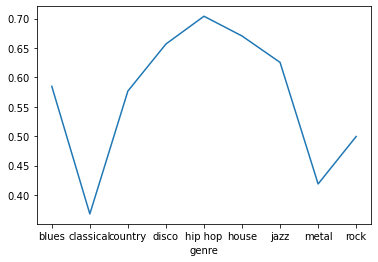

In [19]:
fig = df_genres['danceability'].plot()
plt.show()

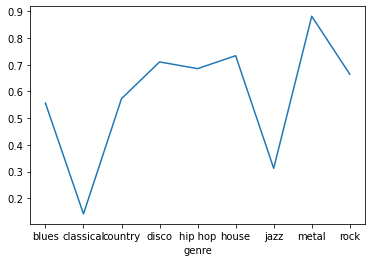

In [22]:
fig = df_genres['energy'].plot()
plt.show()

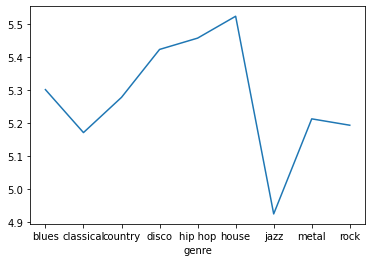

In [23]:
fig = df_genres['key'].plot()
plt.show()

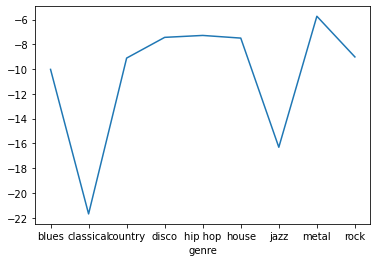

In [24]:
fig = df_genres['loudness'].plot()
plt.show()

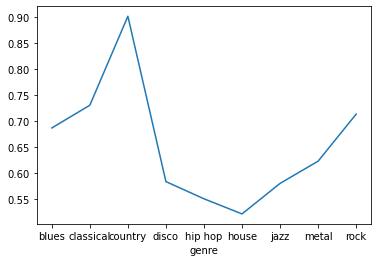

In [37]:
fig = df_genres['mode'].plot()
plt.show()

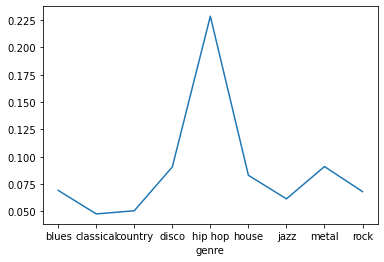

In [38]:
fig = df_genres['speechiness'].plot()
plt.show()

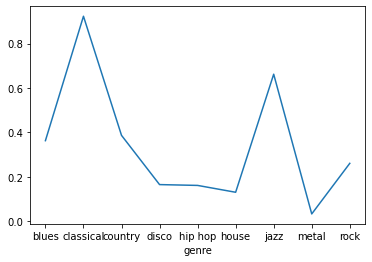

In [39]:
fig = df_genres['acousticness'].plot()
plt.show()

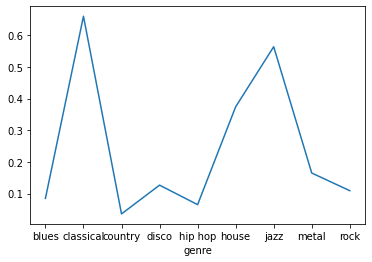

In [108]:
fig = df_genres['instrumentalness'].plot()
plt.show()

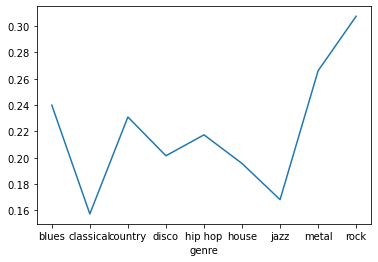

In [109]:
fig = df_genres['liveness'].plot()
plt.show()

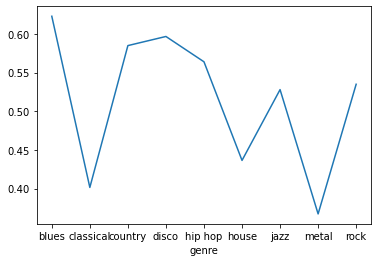

In [110]:
fig = df_genres['valence'].plot()
plt.show()

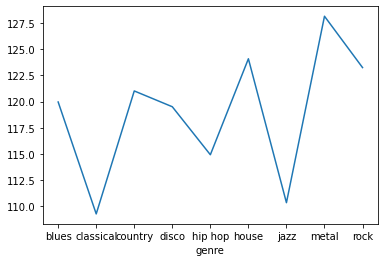

In [111]:
fig = df_genres['tempo'].plot()
plt.show()

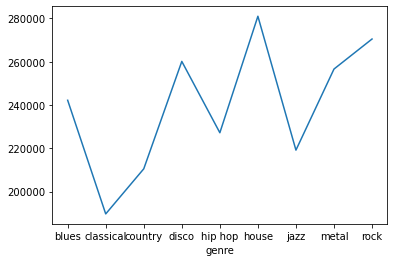

In [112]:
fig = df_genres['duration_ms'].plot()
plt.show()

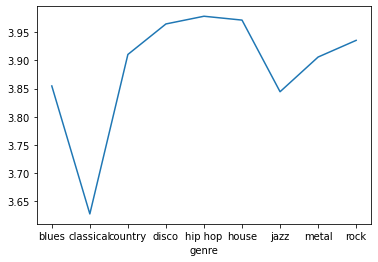

In [113]:
fig = df_genres['time_signature'].plot()
plt.show()

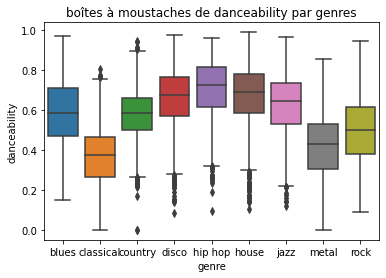

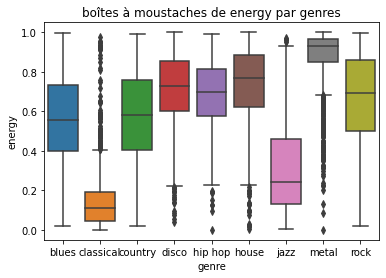

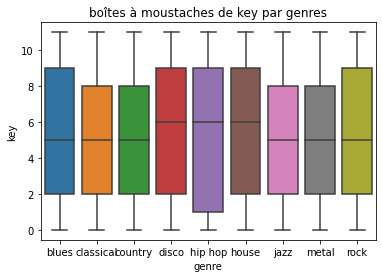

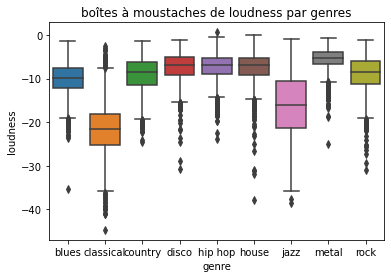

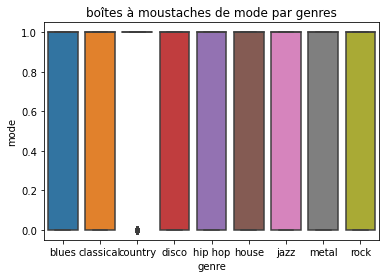

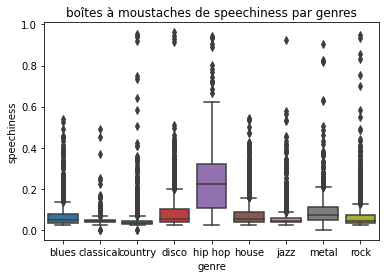

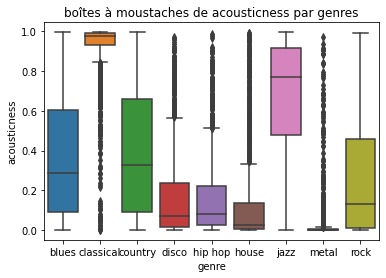

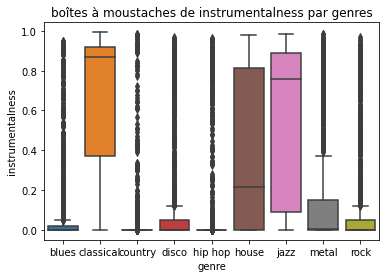

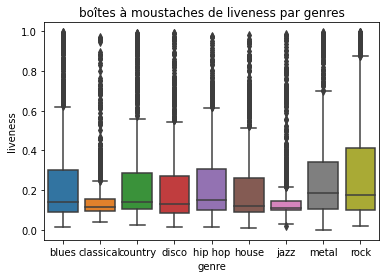

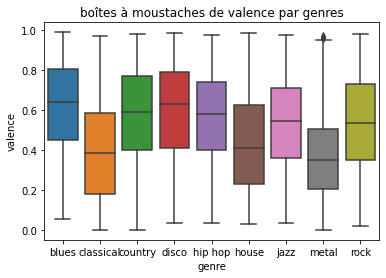

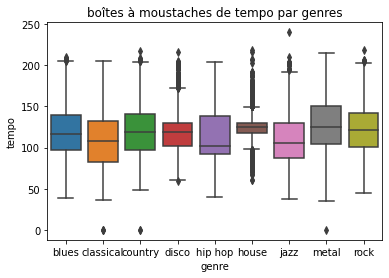

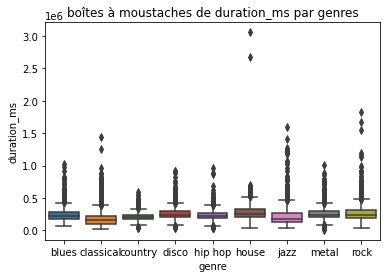

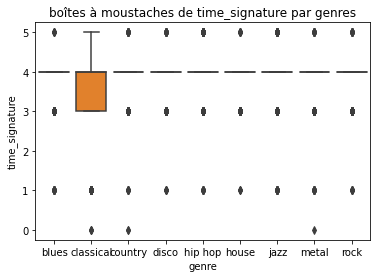

In [93]:
#Boites à moustaches
import seaborn as sns
ax = sns.boxplot(y="danceability", x="genre", data=df)
plt.title('boîtes à moustaches de danceability par genres')
plt.show()
ax = sns.boxplot(y="energy", x="genre", data=df)
plt.title('boîtes à moustaches de energy par genres')
plt.show()
ax = sns.boxplot(y="key", x="genre", data=df)
plt.title('boîtes à moustaches de key par genres')
plt.show()
ax = sns.boxplot(y="loudness", x="genre", data=df)
plt.title('boîtes à moustaches de loudness par genres')
plt.show()
ax = sns.boxplot(y="mode", x="genre", data=df)
plt.title('boîtes à moustaches de mode par genres')
plt.show()
ax = sns.boxplot(y="speechiness", x="genre", data=df)
plt.title('boîtes à moustaches de speechiness par genres')
plt.show()
ax = sns.boxplot(y="acousticness", x="genre", data=df)
plt.title('boîtes à moustaches de acousticness par genres')
plt.show()
ax = sns.boxplot(y="instrumentalness", x="genre", data=df)
plt.title('boîtes à moustaches de instrumentalness par genres')
plt.show()
ax = sns.boxplot(y="liveness", x="genre", data=df)
plt.title('boîtes à moustaches de liveness par genres')
plt.show()
ax = sns.boxplot(y="valence", x="genre", data=df)
plt.title('boîtes à moustaches de valence par genres')
plt.show()
ax = sns.boxplot(y="tempo", x="genre", data=df)
plt.title('boîtes à moustaches de tempo par genres')
plt.show()
ax = sns.boxplot(y="duration_ms", x="genre", data=df)
plt.title('boîtes à moustaches de duration_ms par genres')
plt.show()
ax = sns.boxplot(y="time_signature", x="genre", data=df)
plt.title('boîtes à moustaches de time_signature par genres')
plt.show()

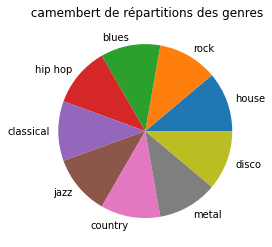

In [36]:
effectif = df.genre.value_counts()
plt.pie(effectif,labels=effectif.index)
plt.title(' camembert de répartitions des genres')
plt.show()

In [34]:
effectif

house        1755
rock         1755
blues        1755
hip hop      1755
classical    1755
jazz         1755
country      1755
metal        1755
disco        1755
Name: genre, dtype: int64

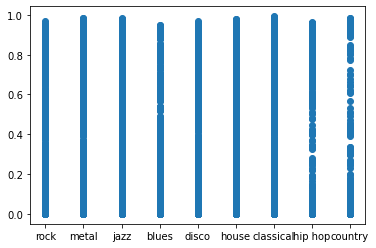

In [41]:
#nuage de points genre-instrumentalness
x = df['genre']
y = df['instrumentalness']
plt.scatter(x,y)
plt.show()

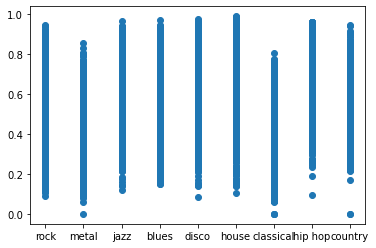

In [42]:
#nuage de points genre-danceability
z=df['danceability']
plt.scatter(x,z)
plt.show()

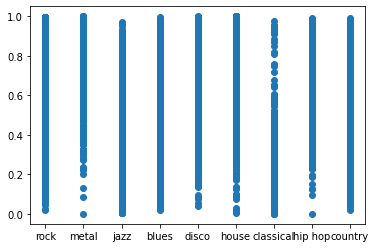

In [43]:
#nuage de points genre-energy
a=df['energy']
plt.scatter(x,a)
plt.show()

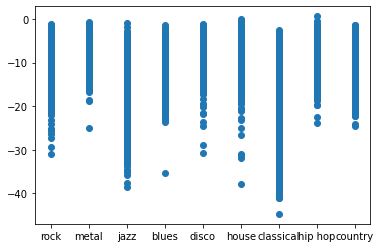

In [44]:
#nuage de points genre-loudness
b=df['loudness']
plt.scatter(x,b)
plt.show()

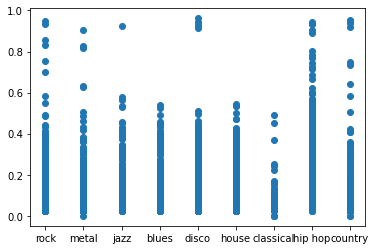

In [89]:
#nuage de points genre-speechness
d=df['speechiness']
plt.scatter(x,d)
plt.show()

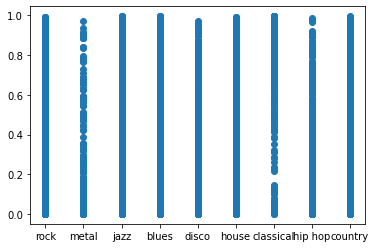

In [90]:
#nuage de points genre-acousticness
e=df['acousticness']
plt.scatter(x,e)
plt.show()

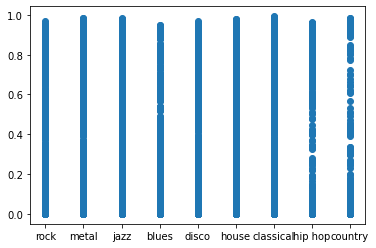

In [107]:
#nuage de points genre-instrumentalness
f=df['instrumentalness']
plt.scatter(x,f)
plt.show()

In [76]:
#tableau croisé
impute_grps = df.pivot_table(values=["danceability"], index=["genre","mode"], aggfunc=np.mean)
print(impute_grps)

                danceability    energy   loudness
genre     mode                                   
blues     0.0       0.608784  0.572245  -9.835474
          1.0       0.573822  0.549552 -10.112363
classical 0.0       0.338548  0.143877 -22.784918
          1.0       0.378656  0.141090 -21.288821
country   0.0       0.594259  0.613022  -8.494546
          1.0       0.574856  0.568806  -9.180522
disco     0.0       0.669757  0.717314  -7.413489
          1.0       0.647514  0.705894  -7.459318
hip hop   0.0       0.701177  0.683607  -7.321838
          1.0       0.706359  0.687110  -7.253717
house     0.0       0.676954  0.725686  -7.701862
          1.0       0.664481  0.741608  -7.313100
jazz      0.0       0.632259  0.334491 -15.730257
          1.0       0.620652  0.296386 -16.732637
metal     0.0       0.408533  0.883445  -5.748329
          1.0       0.425013  0.880468  -5.727185
rock      0.0       0.499052  0.695851  -8.568012
          1.0       0.499665  0.652180  -9.201902


In [73]:
#tableau croisé
impute_grps = df.pivot_table(values=["energy"], index=["genre","mode","time_signature"], aggfunc=np.mean)
print(impute_grps)

                             energy
genre mode time_signature          
blues 0.0  3.0             0.401892
           4.0             0.589450
           5.0             0.112000
      1.0  1.0             0.393229
           3.0             0.406224
...                             ...
rock  0.0  5.0             0.430000
      1.0  1.0             0.669750
           3.0             0.454904
           4.0             0.665833
           5.0             0.490333

[73 rows x 1 columns]


array([[<AxesSubplot:title={'center':'blues'}>,
        <AxesSubplot:title={'center':'classical'}>,
        <AxesSubplot:title={'center':'country'}>],
       [<AxesSubplot:title={'center':'disco'}>,
        <AxesSubplot:title={'center':'hip hop'}>,
        <AxesSubplot:title={'center':'house'}>],
       [<AxesSubplot:title={'center':'jazz'}>,
        <AxesSubplot:title={'center':'metal'}>,
        <AxesSubplot:title={'center':'rock'}>]], dtype=object)

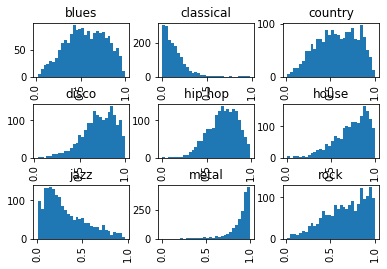

In [77]:
#histogramme d'energy par genre
df.hist(column="energy",by="genre",bins=30)

array([[<AxesSubplot:title={'center':'blues'}>,
        <AxesSubplot:title={'center':'classical'}>,
        <AxesSubplot:title={'center':'country'}>],
       [<AxesSubplot:title={'center':'disco'}>,
        <AxesSubplot:title={'center':'hip hop'}>,
        <AxesSubplot:title={'center':'house'}>],
       [<AxesSubplot:title={'center':'jazz'}>,
        <AxesSubplot:title={'center':'metal'}>,
        <AxesSubplot:title={'center':'rock'}>]], dtype=object)

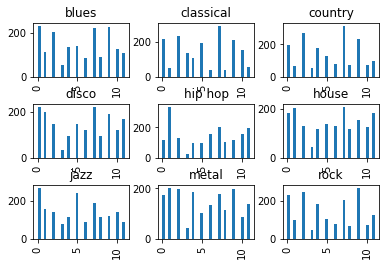

In [86]:
#histogramme de key par genre
df.hist(column="key",by="genre",bins=30)

array([[<AxesSubplot:title={'center':'blues'}>,
        <AxesSubplot:title={'center':'classical'}>,
        <AxesSubplot:title={'center':'country'}>],
       [<AxesSubplot:title={'center':'disco'}>,
        <AxesSubplot:title={'center':'hip hop'}>,
        <AxesSubplot:title={'center':'house'}>],
       [<AxesSubplot:title={'center':'jazz'}>,
        <AxesSubplot:title={'center':'metal'}>,
        <AxesSubplot:title={'center':'rock'}>]], dtype=object)

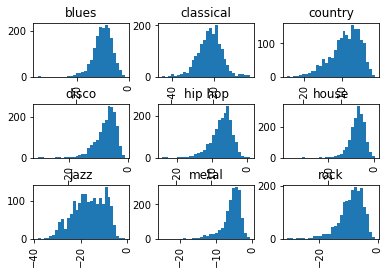

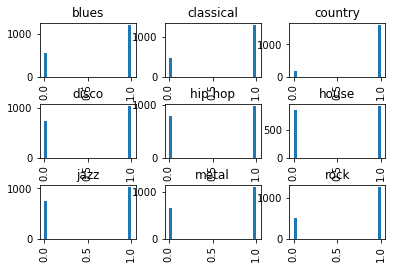

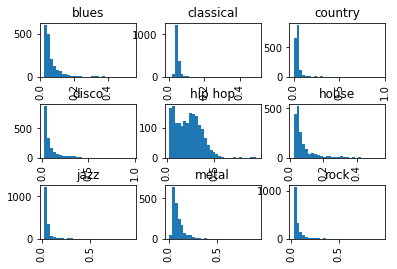

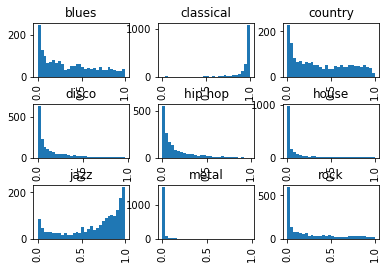

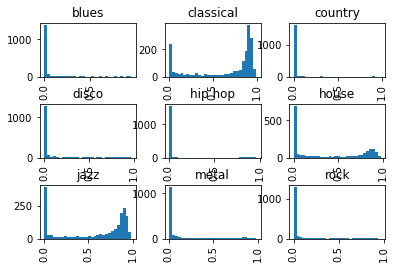

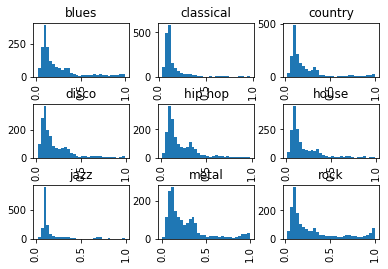

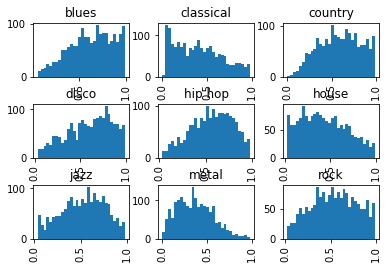

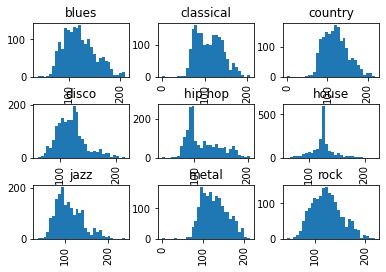

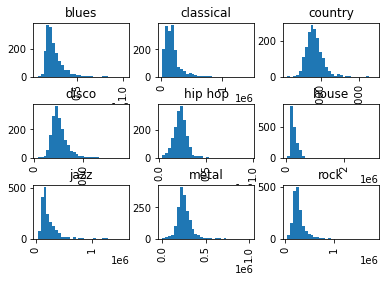

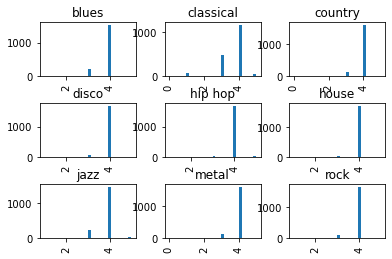

In [88]:
df.hist(column="loudness",by="genre",bins=30)
df.hist(column="mode",by="genre",bins=30)
df.hist(column="speechiness",by="genre",bins=30)
df.hist(column="acousticness",by="genre",bins=30)
df.hist(column="instrumentalness",by="genre",bins=30)
df.hist(column="liveness",by="genre",bins=30)
df.hist(column="valence",by="genre",bins=30)
df.hist(column="tempo",by="genre",bins=30)
df.hist(column="duration_ms",by="genre",bins=30)
df.hist(column="time_signature",by="genre",bins=30)